# <span style="color:red"> NSL Esercitazione 10 </span>
### <span style="color:pink">  Giacomo Boringhieri 13457A</span>

Per affrontare problemi di grandi dimensioni in maniera più efficiente è utile ricorrere a tecniche di **parallelizzazione** del codice. Tra i diversi approcci disponibili, il paradigma **Single Program Multiple Data** (SPMD) si dimostra particolarmente adatto in ambienti distribuiti. In questo modello, lo stesso programma viene eseguito contemporaneamente su più processi, ognuno dei quali lavora su una porzione diversa dei dati. Ogni processo è identificato da un **rank**, un indice numerico che ne definisce l’identità e il ruolo nell’esecuzione. Questo permette di utilizzare un unico codice sorgente, ma con flussi di calcolo che possono variare a seconda del rank assegnato.

Nell’ambito di questa esercitazione è stata implementata la **parallelizzazione di un Algoritmo Genetico (GA)**, sviluppato in precedenza, sfruttando la libreria **Message Passing Interface (MPI)**. Questa libreria fornisce strumenti per lo scambio di messaggi tra processi, semplificando attività come la suddivisione del carico di lavoro, la sincronizzazione e la raccolta dei risultati.

L’obiettivo è risolvere il **Problema del Commesso Viaggiatore (TSP)** applicato ai **110 capoluoghi di provincia italiani**, le cui coordinate (latitudine e longitudine) sono contenute nel file *cap_prov_ita.dat*. A tale scopo sono state avviate **8 simulazioni indipendenti**, ognuna eseguita su un processo distinto e chiamata *continente*. Ogni continente gestisce ed evolve in autonomia una propria popolazione di soluzioni, cercando di migliorare progressivamente i percorsi tramite l’Algoritmo Genetico.

I continenti si scambiano il migliore di loro in maniera ciclica, il numero i lo passa a i+1 e così via...

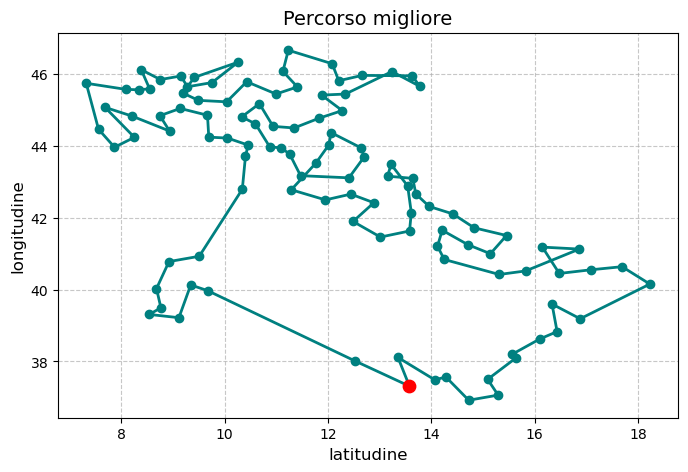

Valore della loss con norma quadra L2: 63.1083


In [13]:
import matplotlib.pyplot as plt

# File per il plot
filename_plot = "RANK/cap_prov_rank0_best_path_final_auto.dat"

# File da cui prendere l'ultima y
filename_last_y = "RANK/cap_prov_rank0_champions_auto.dat"

# Lettura del file per il plot
x = []
y = []

with open(filename_plot, "r") as f:
    for line in f:
        if line.strip() == "" or line.startswith("#"):
            continue
        values = line.split()
        x.append(float(values[0]))
        y.append(float(values[1]))

# Creazione del plot più bello
plt.figure(figsize=(8,5))
plt.plot(x, y, marker='o', linestyle='-', color='teal', linewidth=2, markersize=6)
plt.xlabel("latitudine", fontsize=12)
plt.ylabel("longitudine", fontsize=12)
plt.title("Percorso migliore", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Evidenzia l'ultimo punto
plt.scatter(x[-1], y[-1], color='red', s=80, zorder=5)

plt.show()

# Lettura dell'ultima y del file champions
with open(filename_last_y, "r") as f:
    last_line = None
    for line in f:
        if line.strip() == "" or line.startswith("#"):
            continue
        last_line = line
if last_line:
    last_y = float(last_line.split()[1])
    print(rf"Valore della loss con norma quadra L2: {last_y}")
else:
    print(f"File {filename_last_y} vuoto o senza dati validi.")

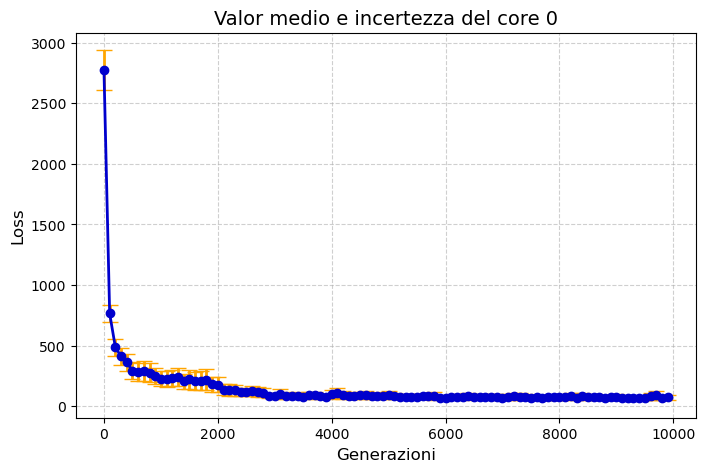

In [14]:
import matplotlib.pyplot as plt

# Nome del file
filename = "RANK/cap_prov_rank0_best_half_auto.dat"

# Liste per x, y e errore su y
x = []
y = []
erry = []

# Lettura del file
with open(filename, "r") as f:
    for line in f:
        if line.strip() == "" or line.startswith("#"):
            continue
        values = line.split()
        x.append(float(values[0]))
        y.append(float(values[1]))
        erry.append(float(values[2]))

# Creazione del plot
plt.figure(figsize=(8,5))
plt.errorbar(x, y, yerr=erry, fmt='o-', color='mediumblue', ecolor='orange',
             elinewidth=2, capsize=6, markersize=6, linewidth=2)
plt.xlabel("Generazioni", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Valor medio e incertezza del core 0", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In questo caso è stato il core 0 a trovare il minimo, per questo ho fatto i plot su di lui

Come si può vedere ci sono ancora incroci quindi non abbiamo ottenuto sicuramente il minimo globale